# Pymaceuticals Summary

  
* Final tumor volume was smaller, on average, for mice that were part of the Capomulin and Ramican regimens than for the Infubinol and Ceftamin treatments.

* Mouse weight and Tumor Volume for the group treated with Capomulin have a strongly positive correlation (heavier mice have larger tumor volume) with an r-value of 0.84. This effect could be skewing the data and could be the reason for the smaller tumor volumes observed for the Capomulin and Ramican regimens. More analysis needs to be done on wether or not mouse weight was evenly distributed across all regimens and, if so, does mouse weight correlate with final tumor size throughout.

* The correlation of mouse weight and tumor volume could also give some information on the efficacy of the drug. Larger doses may be required for the treatment to have better results on heavier mice.
    
* The number of male versus female mice was evenly split with 125 mice being male and the other 123 mice being female.

In [1]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import random

In [2]:
#set Path for data
mouse_path = "data/Mouse_metadata.csv"
study_path = "data/Study_results.csv"

#read in data
mouse_data = pd.read_csv(mouse_path)
study_results = pd.read_csv(study_path)

#merge DataFrames
combined_df = study_results.merge(mouse_data, on = 'Mouse ID')
combined_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
#Number of mice
len(combined_df['Mouse ID'].unique())

249

In [4]:
#get duplicate entries
combined_df[combined_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
#get all data for duplicated mouse
mouseG989 = combined_df[combined_df['Mouse ID'] == 'g989']
mouseG989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#remove duplicated mouse by its ID
cleaned_df = combined_df[combined_df['Mouse ID'] != 'g989']
#check number of mice in clean DataFrame
cleaned_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_group = cleaned_df.groupby('Drug Regimen')
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_Tvol = regimen_group.mean()['Tumor Volume (mm3)']
median_Tvol = regimen_group.median()['Tumor Volume (mm3)']
var_Tvol = regimen_group.var()['Tumor Volume (mm3)']
std_Tvol = regimen_group.std()['Tumor Volume (mm3)']
SEM_Tvol = regimen_group.sem()['Tumor Volume (mm3)']

# Assemble the resulting series into a single summary DataFrame.

stat_summary = pd.DataFrame({'Mean Tumor Volume':mean_Tvol,'Median Tumor Volume':median_Tvol,
                             'Tumor Volume Variance':var_Tvol,'Tumor Volume Std. Dev.':std_Tvol,
                             'Tumor Volume Std. Err.':SEM_Tvol})
stat_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
functions = {'Tumor Volume (mm3)':['mean','median','var','std','sem']}

# Using the aggregation method, produce the same summary statistics in a single line.
agg_stat_summary = regimen_group.aggregate(func = functions)
agg_stat_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:title={'center':'Number of Mice Tested per Regimen'}, xlabel='Drug Regimen', ylabel='Number of Mice Tested'>

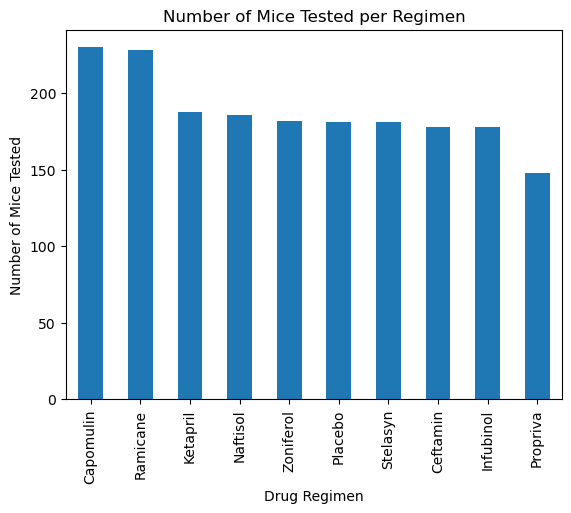

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_group.count()['Timepoint'].sort_values(ascending=False).plot(kind='bar', ylabel = 'Number of Mice Tested', 
                                                                     title = "Number of Mice Tested per Regimen")

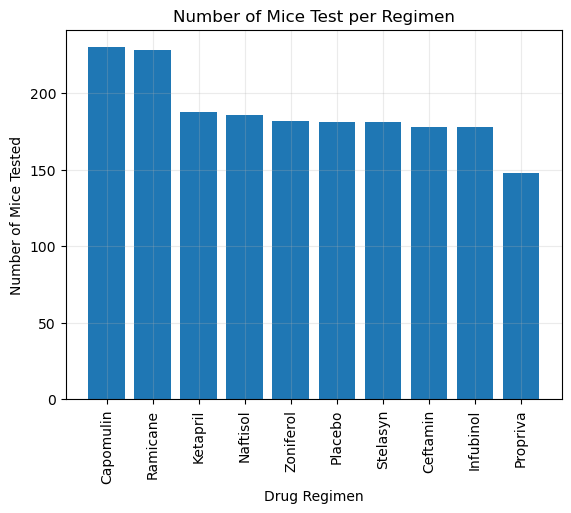

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot
y_values = regimen_group.count()['Timepoint'].sort_values(ascending=False)
x_values = regimen_group.count()['Timepoint'].sort_values(ascending=False).index

plt.title('Number of Mice Test per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mice Tested')
plt.grid(alpha=0.25)
plt.xticks(rotation = 90)

plt.bar(x_values, y_values)

plt.show()

<AxesSubplot:title={'center':'Male vs Female mice'}, ylabel='Sex'>

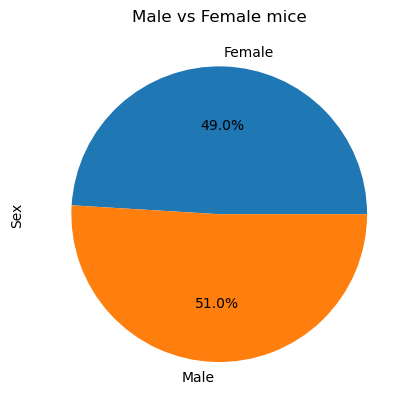

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#get sex of each mouse .count()
sex_group = cleaned_df.groupby('Sex').count()['Mouse ID']
sex_group.plot(kind = 'pie', title = "Male vs Female mice", ylabel = 'Sex', autopct='%1.1f%%')

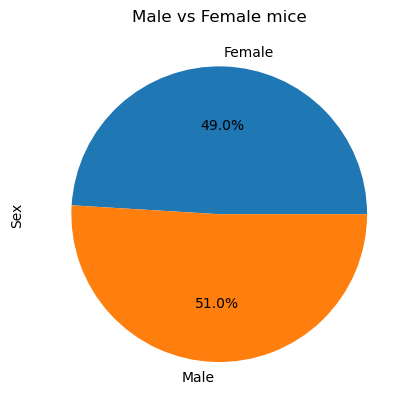

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title('Male vs Female mice')
plt.ylabel('Sex')
plt.pie(sex_group, labels = ['Female','Male'], autopct = '%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_time_group = cleaned_df.groupby("Mouse ID")
last_time_df = pd.DataFrame(last_time_group["Timepoint"].max())
last_time_df.reset_index()
#merge with cleaned_df
final_vol_df = pd.merge(last_time_df, cleaned_df, on = ["Mouse ID", "Timepoint"])
final_vol_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
final_vol = []

for drug in treatments:
    
    # Locate the rows which contain mice on each drug and store the tumor volumes from each
    tumor_vol = final_vol_df.loc[final_vol_df['Drug Regimen'] == drug, 'Tumor Volume (mm3)'] 
    
     # add subset to final_vol list for plotting
    final_vol.append(tumor_vol)

    #Calculate the IQR and quantitatively determine if there are any potential outliers.     
    quartiles = tumor_vol.quantile([.25,.5,.75])
    iqr = quartiles[.75] - quartiles[.25]
    upper_bound = quartiles[.75] + (1.5*iqr)
    lower_bound = quartiles[.25] - (1.5*iqr)
    
    #print regimen name and IQR value
    print(f"\n{drug}:")
    print(f' IQR: {round(iqr,2)}')
    
     # create df of outliers using upper and lower bound 
    outliers_df = final_vol_df.loc[(final_vol_df['Drug Regimen'] == drug) & 
                                   ((final_vol_df['Tumor Volume (mm3)'] < lower_bound) | 
                                    (final_vol_df['Tumor Volume (mm3)'] > upper_bound))]
    
    #print out outliers if any exist
    if len(outliers_df) > 0:
        print(f" Outliers:")
        for i in range(len(outliers_df)):
            #print mouse index and final vol for all outliers
            print(f"\n   *Mouse Index:{outliers_df['Tumor Volume (mm3)'].index[i]}")
            print(f"   *Final Volume:{outliers_df['Tumor Volume (mm3)'].values[i]} mm3") 
    else:
        print(" No potential outliers")


Capomulin:
 IQR: 7.78
 No potential outliers

Ramicane:
 IQR: 9.1
 No potential outliers

Infubinol:
 IQR: 11.48
 Outliers:

   *Mouse Index:31
   *Final Volume:36.3213458 mm3

Ceftamin:
 IQR: 15.58
 No potential outliers


In [30]:
type(tumor_vol)

pandas.core.series.Series

In [15]:
#outlier mouse information using index
infu_outlier = final_vol_df.iloc[31,:]
infu_outlier

Mouse ID                   c326
Timepoint                     5
Tumor Volume (mm3)    36.321346
Metastatic Sites              0
Drug Regimen          Infubinol
Sex                      Female
Age_months                   18
Weight (g)                   25
Name: 31, dtype: object

In [16]:
#print all data for outlier using "Mouse ID"
infu_outlier_data = cleaned_df[cleaned_df['Mouse ID'] == infu_outlier['Mouse ID']]
infu_outlier_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
213,c326,0,45.000000,0,Infubinol,Female,18,25
214,c326,5,36.321346,0,Infubinol,Female,18,25


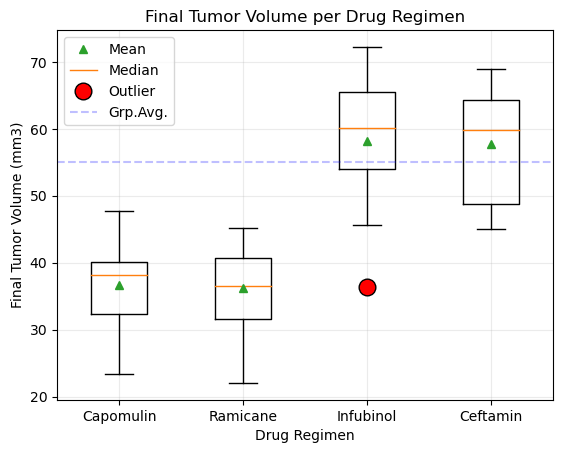

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#format info for fliers
flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  markeredgecolor='black')

#plot
plt.grid(alpha=0.25)
plt.title('Final Tumor Volume per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
fig1 = plt.boxplot(final_vol, labels = treatments,
                   flierprops = flierprops, showmeans = True)

#plot overall average
avg_tumor_vol = final_vol_df['Tumor Volume (mm3)'].mean()
group_avg = plt.hlines(y=avg_tumor_vol, xmin = 0.5, xmax=4.5,
                         linestyles = 'dashed', alpha=0.25, color = 'blue')

#determine symbols and labels for the legend
leg_handles = [fig1['means'][0],fig1['medians'][0],fig1['fliers'][0],group_avg]
leg_labels = ['Mean','Median',"Outlier","Grp.Avg."]
### leg_labels = ['Mean','Median',"Outlier"]
plt.legend(handles = leg_handles, labels = leg_labels)

plt.show()


## Line and Scatter Plots

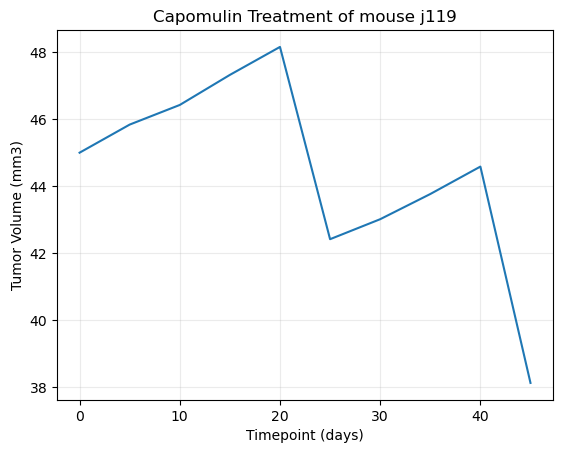

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#view mice who recieved Capomulin regimen
Capo_group = regimen_group.get_group('Capomulin')

#pick a 'random' mouse and store data from selected mouse in DataFrame
ran_mouse = random.choices(Capo_group['Mouse ID'].unique(), k=1)
ran_mouse_data = cleaned_df[cleaned_df['Mouse ID'] == ran_mouse[0]]

#plot timepoint vs tumor vol for random mouse
plt.grid(alpha = 0.25)
plt.title(f'Capomulin Treatment of mouse {ran_mouse[0]}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(ran_mouse_data['Timepoint'], ran_mouse_data['Tumor Volume (mm3)'])

#set xticks to keep x-axis range the same independent of data
plt.xticks(range(0,50,10))

plt.show()

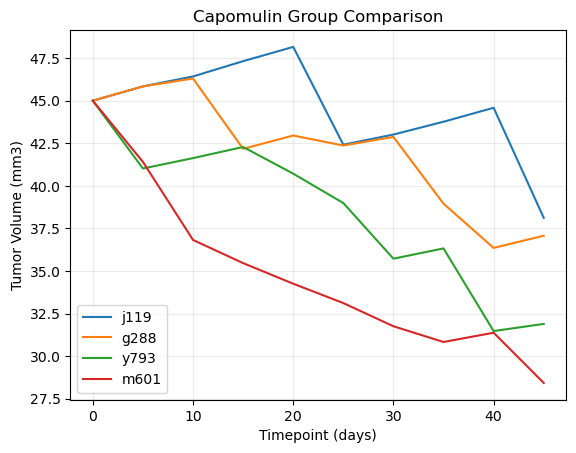

In [29]:
#generate list of three random 'Mouse ID' from Capo group 
#that have Tumor Vol values for 45 day timepoint
capo_full_time = Capo_group[(Capo_group['Timepoint'] == 45)]['Mouse ID'].unique().tolist()

#remove mouse from above from sample list
if ran_mouse[0] in capo_full_time:
    capo_full_time.remove(ran_mouse[0])
    
random_mice = random.sample(capo_full_time, k=3)

#get data for the chosen mice
mouse_0 = cleaned_df[cleaned_df['Mouse ID'] == random_mice[0]]
mouse_1 = cleaned_df[cleaned_df['Mouse ID'] == random_mice[1]]
mouse_2 = cleaned_df[cleaned_df['Mouse ID'] == random_mice[2]]

#plot three new mice and mouse from cell above
plt.grid(alpha = 0.25)
plt.title('Capomulin Group Comparison')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(ran_mouse_data['Timepoint'], ran_mouse_data['Tumor Volume (mm3)'], label = ran_mouse[0])
plt.plot(mouse_0['Timepoint'], mouse_0['Tumor Volume (mm3)'], label = random_mice[0])
plt.plot(mouse_1['Timepoint'], mouse_1['Tumor Volume (mm3)'], label = random_mice[1])
plt.plot(mouse_2['Timepoint'], mouse_2['Tumor Volume (mm3)'], label = random_mice[2])

#format legend
plt.legend()

plt.show()

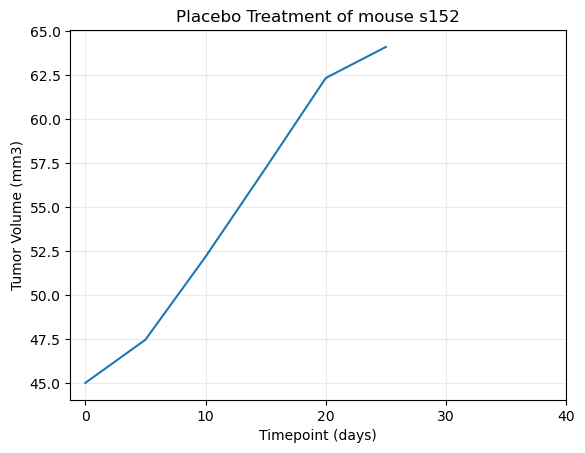

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#view mice who recieved Capomulin regimen and creat new df that hold information for on mouse
placebo_group = regimen_group.get_group('Placebo')

#pick a 'random' mouse
ran_mouse = random.choices(placebo_group['Mouse ID'].unique(), k=1)
ran_mouse_data = cleaned_df[cleaned_df['Mouse ID'] == ran_mouse[0]]

#plot timepoint vs tumor vol for mouse b128
plt.grid(alpha = 0.25)
plt.title(f'Placebo Treatment of mouse {ran_mouse[0]}')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(ran_mouse_data['Timepoint'], ran_mouse_data['Tumor Volume (mm3)'])

#set xticks to keep x-axis range the same independent of data
plt.xticks(range(0,50,10))

plt.show()

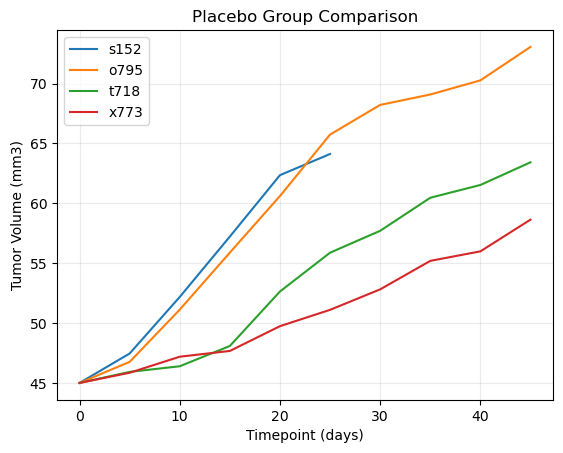

In [21]:
#generate list of three random 'Mouse ID' from Capo group 
#that have Tumor Vol values for 45 day timepoint
plac_full_time = placebo_group[(placebo_group['Timepoint'] == 45)]['Mouse ID'].unique().tolist()

#remove mouse from above from sample list
if ran_mouse[0] in plac_full_time:
    plac_full_time.remove(ran_mouse[0])
    
random_mice = random.sample(plac_full_time, k=3)

#get data for the chosen mice
mouse_0 = cleaned_df[cleaned_df['Mouse ID'] == random_mice[0]]
mouse_1 = cleaned_df[cleaned_df['Mouse ID'] == random_mice[1]]
mouse_2 = cleaned_df[cleaned_df['Mouse ID'] == random_mice[2]]

#plot three new mice and mouse from cell above
plt.grid(alpha = 0.25)
plt.title('Placebo Group Comparison')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(ran_mouse_data['Timepoint'], ran_mouse_data['Tumor Volume (mm3)'], label = ran_mouse[0])
plt.plot(mouse_0['Timepoint'], mouse_0['Tumor Volume (mm3)'], label = random_mice[0])
plt.plot(mouse_1['Timepoint'], mouse_1['Tumor Volume (mm3)'], label = random_mice[1])
plt.plot(mouse_2['Timepoint'], mouse_2['Tumor Volume (mm3)'], label = random_mice[2])

#format legend
plt.legend()

plt.show()

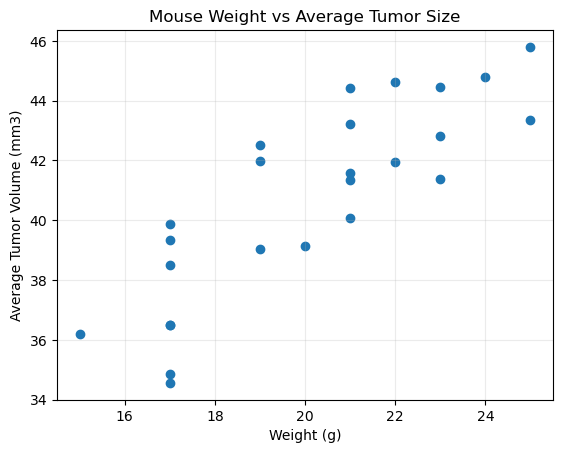

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.grid(alpha = 0.25)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Size')
plt.scatter(Capo_group.groupby('Mouse ID').mean()['Weight (g)'], Capo_group.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])

plt.show()

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(Capo_group.groupby('Mouse ID').mean()['Weight (g)'],
                                                        Capo_group.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])

The correlation between mouse weight and the average tumor volume is 0.84


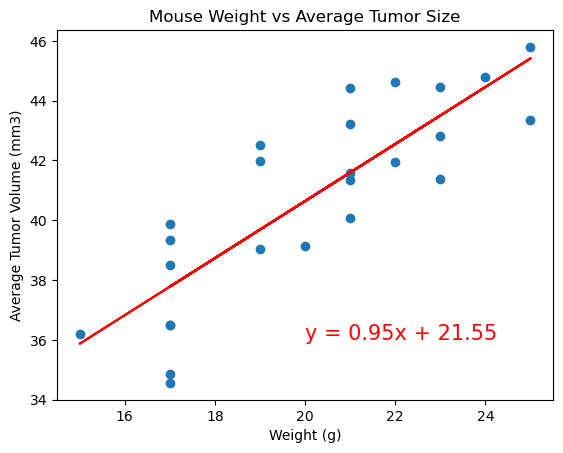

In [24]:
#plot results
regress_values = Capo_group.groupby('Mouse ID').mean()['Weight (g)']*slope +intercept

#line to show on plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter data
plt.scatter(Capo_group.groupby('Mouse ID').mean()['Weight (g)'],
            Capo_group.groupby('Mouse ID').mean()['Tumor Volume (mm3)'])

#plot regression line
plt.plot(Capo_group.groupby('Mouse ID').mean()['Weight (g)'],
         regress_values,"r-")


#print equation on chart
plt.annotate(line_eq,(20,36),fontsize=15,color="red")

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Size')

#print correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue,2)}")


plt.show()